## Открытие файла с данными и изучение информации


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from scipy import stats as st
import math
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe() 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


**Вывод:** Всего в датасете 16715 строк и 11 колонок с типами данных float, object. есть пропущенные значения в некоторых столбцах. Данные рассматриваются с 1980-2016 года. Все данные по продажам близки к максимальным значениям. а оценки критиков распределены равномерно.

## Подготовка данных

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.isnull().sum(axis = 0)# получили количество NaN вхождений в каждую колонку можно с помощью метода df.isnull().sum и передали axis = 0 в методе sum, чтобы получить количество NaN вхождений в каждом столбце.

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

In [8]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [9]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [10]:
data['name'].value_counts()

Need for Speed: Most Wanted                 12
LEGO Marvel Super Heroes                     9
FIFA 14                                      9
Madden NFL 07                                9
Ratatouille                                  9
                                            ..
Smart Kid's Mega Game Mix                    1
Wizardry XTH: Unlimited Students             1
Triple Play 98                               1
Super Real Mahjong Graffiti                  1
SaGa 3: Jikuu no Hasha - Shadow or Light     1
Name: name, Length: 11559, dtype: int64

In [11]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [12]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.5       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [13]:
data['critic_score'].value_counts()

70.00    256
71.00    254
75.00    245
78.00    240
73.00    238
        ... 
29.00      3
13.00      1
22.00      1
17.00      1
21.00      1
Name: critic_score, Length: 82, dtype: int64

In [14]:
data.loc[(data['critic_score'] == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
data['critic_score'] = data['critic_score'].fillna(-1).astype('Int64')

In [16]:
data['rating'].fillna(0, inplace=True)
data['user_score'].fillna(0, inplace=True)

In [17]:
data.loc[(data['user_score'] == 'tbd')].head(20)
data['user_score'] = data['user_score'].replace('tbd', 0).astype('float')

In [18]:
data.loc[(data['year_of_release'] == 'NaN')]# 269 строк, удалим, т.к. там есть суммы по продажам , чтоб не потерять данные по платформам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
data.loc[(data['name'] == 'NaN')]# 2 строки удалим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
data = data.dropna(subset=['name','year_of_release']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype(int)

In [21]:
data['all_sales'] = data.loc[:, 'na_sales':'other_sales'].sum(1)

In [22]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,0.00,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,0.00,0,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,0.00,0,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,0.00,0,28.31


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод:**
В ходе подготовке данных к исследованию были проделаны следующие действия:
1. Обнаружены пропущенные значения в столбцах:
- в столбцах "Название игры" всего 2 строки и в "Год выпуска" 269 строки с пропущенными значениями, что составляет менее 1% общих данных, поэтому их удалили. В эти удалённые строки вошли пропуски по столбцам "Платформа", "Жанр";
- в столбцах "Рейтинг от организации ESRB" и "Оценка критиков" пропущенные значения, больше половины, но восполнить или заменить эти данные нечем, поэтому их преобразовали в 0;
- в "Оценка позьзователей" значчниея с 0 только одна строка, поэтому все пропущенне значения тоже заменены на 0.
2. Замена данных:
- в столбце "Оценка пользователей" были обнаружены строки с значением tbd, что значит To Be Determined, то есть "Будет определено", поэтому данные значения заменим на 0.
3. Преобразованный типы данные в столбце:
- "Год выпуска" сначала переведен в формат года, а после в int;
- столбец "Оценка пользователей" преобразован в вещественный тип.
4. Создан новый столбец:
- просуммированы данные по продажам во всех регионах и добавлены в новый столбец "all_sales".
   

## Исследовательский анализ данных

In [24]:
#pip install -U seaborn

### Расчет колличества выпуска игр в разные годы ###

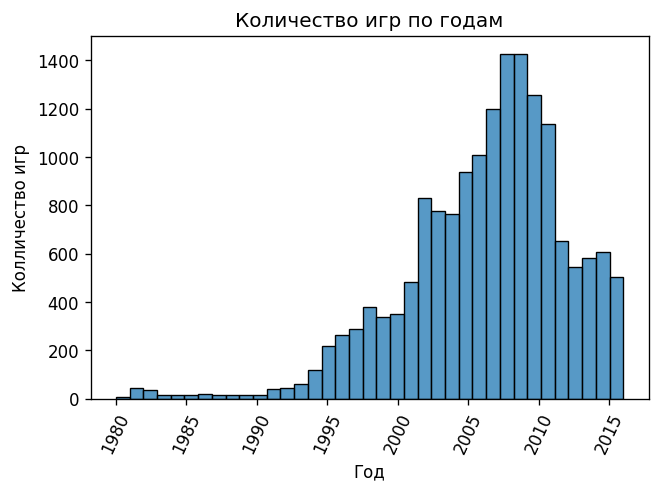

In [25]:
plt.figure(dpi=120)
sns.histplot(data= data, x= 'year_of_release', bins=37)
#=data_name_year_of_release.index, height=data['year_of_release'])
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Колличество игр')
plt.xticks(rotation = 65)
plt.show() 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь была бы уместна визуализация количество игр по годам. А так таблица очень большая и не удобная для анализа. 😲</font>

<font color='DarkBlue'><b>Комментарий студента</b></font><br>
<font color='Blue'><b>Построила график</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Ну вот, другое дело!</font>

**Вывод:** Из сводной таблицы составленной по году впуска игры и количеству игр, видно, что данные начитаются с 1980г, в котором было всего 9 игр, а уже в 2008г было 1427шт.  Можно условно взять актуальный период по количеству игр с 2013г. Пик создания игр можно установивить с 2006 - 2011 года.

### Исследование характера изменения продаж по платформам ###

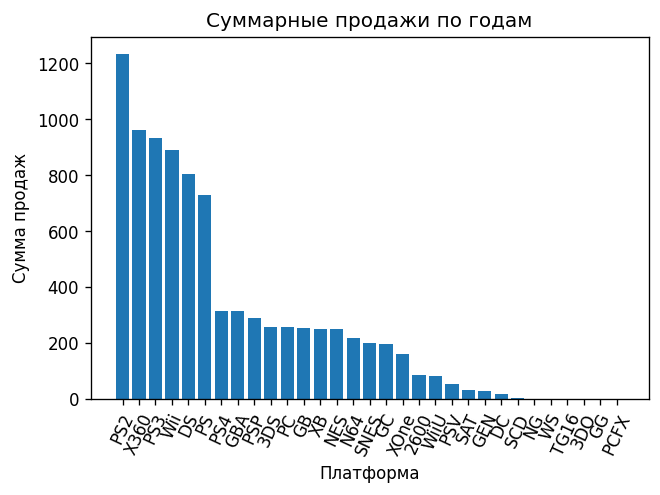

In [26]:
data_platform_sales = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
plt.figure(dpi=120)
plt.bar(x=data_platform_sales.index, height=data_platform_sales['all_sales'])
plt.title('Суммарные продажи по годам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.xticks(rotation = 65)
plt.show() 

In [27]:
platform_top = list(data_platform_sales.reset_index().head(6)['platform'])
platform_top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

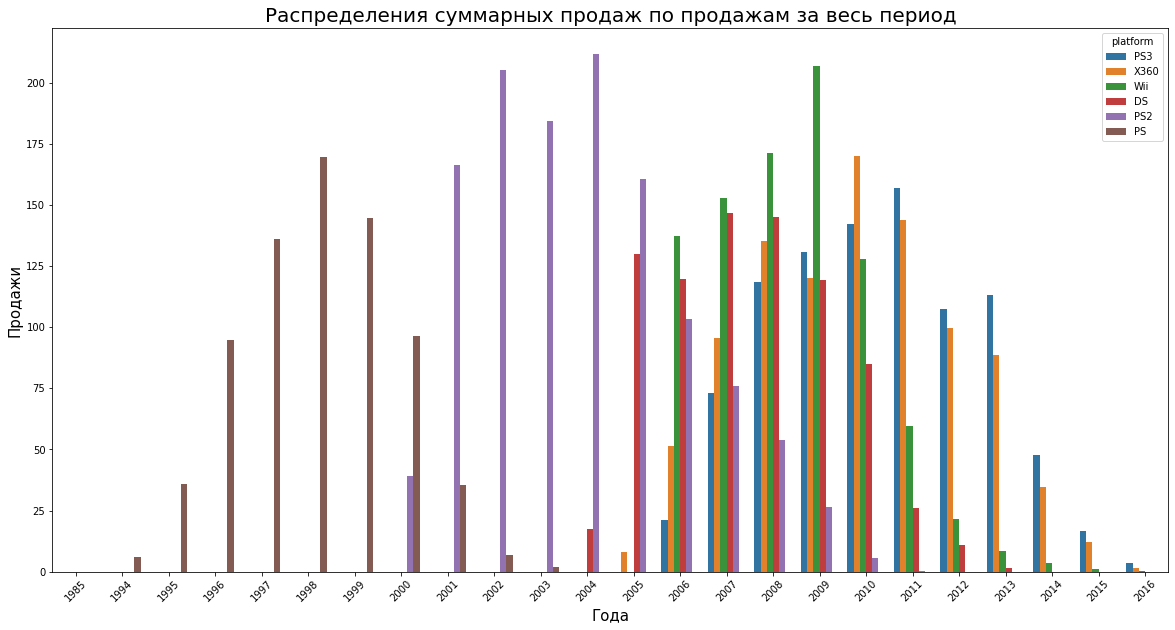

In [28]:
plt.figure(figsize = (20,10))

sns.barplot(data=data.query('platform == @platform_top').sort_values('year_of_release',ascending = False), x='year_of_release', y='all_sales', hue='platform',estimator=sum, ci=0)
plt.title('Распределения суммарных продаж по продажам за весь период', fontsize =20)
plt.xlabel('Года', fontsize =15)
plt.ylabel('Продажи', fontsize =15)
plt.xticks(rotation = 45)
plt.show() 

In [29]:
mean_lifetime = data.pivot_table(index='platform', aggfunc={'year_of_release': ['min','max']}).reset_index()
mean_lifetime = mean_lifetime[('year_of_release','max')] - mean_lifetime[('year_of_release','min')]
print('Среднее времяжизни платформы:', round(mean_lifetime.mean()), 'лет')

Среднее времяжизни платформы: 8 лет


**Вывод:** 
- из графика 'Суммарные продажи по годам' лидирующее место занимает PS2 с 1200 млн и есть платформ с минимальными продажами близкими к 0, такие как SDS, WS, 3DO, PCFX, NG, GG, NG16;
- отберем топ 6 платформ с суммарными продажами не менее 450 млн, это 'PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS';
- из графика 'Распределения суммарных продаж по продажам за весь период' видно, когда появляется, далее доходит до пика роста и идет на спад, каждая из отобранных платформ. В среднем продолжительность существования платформы равно 8 годам.

### Определение актуального периода ###

In [30]:
period_actual = data.query('year_of_release >= 2013')
data_actual = period_actual[period_actual['platform'].isin(platform_top)]
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.60,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.60,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-1,0.00,0,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16367,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,-1,0.00,E,0.01
16383,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,-1,5.10,E10+,0.01
16403,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,-1,0.00,0,0.01
16420,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,0.00,0,0.01


**Вывод:** Далее будем исследовать данные начиная с 2013 года. Эти данные помогут построить прогноз на 2017
год.

### Построение графика по всем продажам игр в разбивке по платформам ###

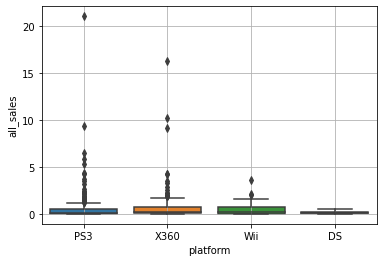

In [31]:
sns.boxplot(data=data_actual, x='platform', y='all_sales')
plt.grid()

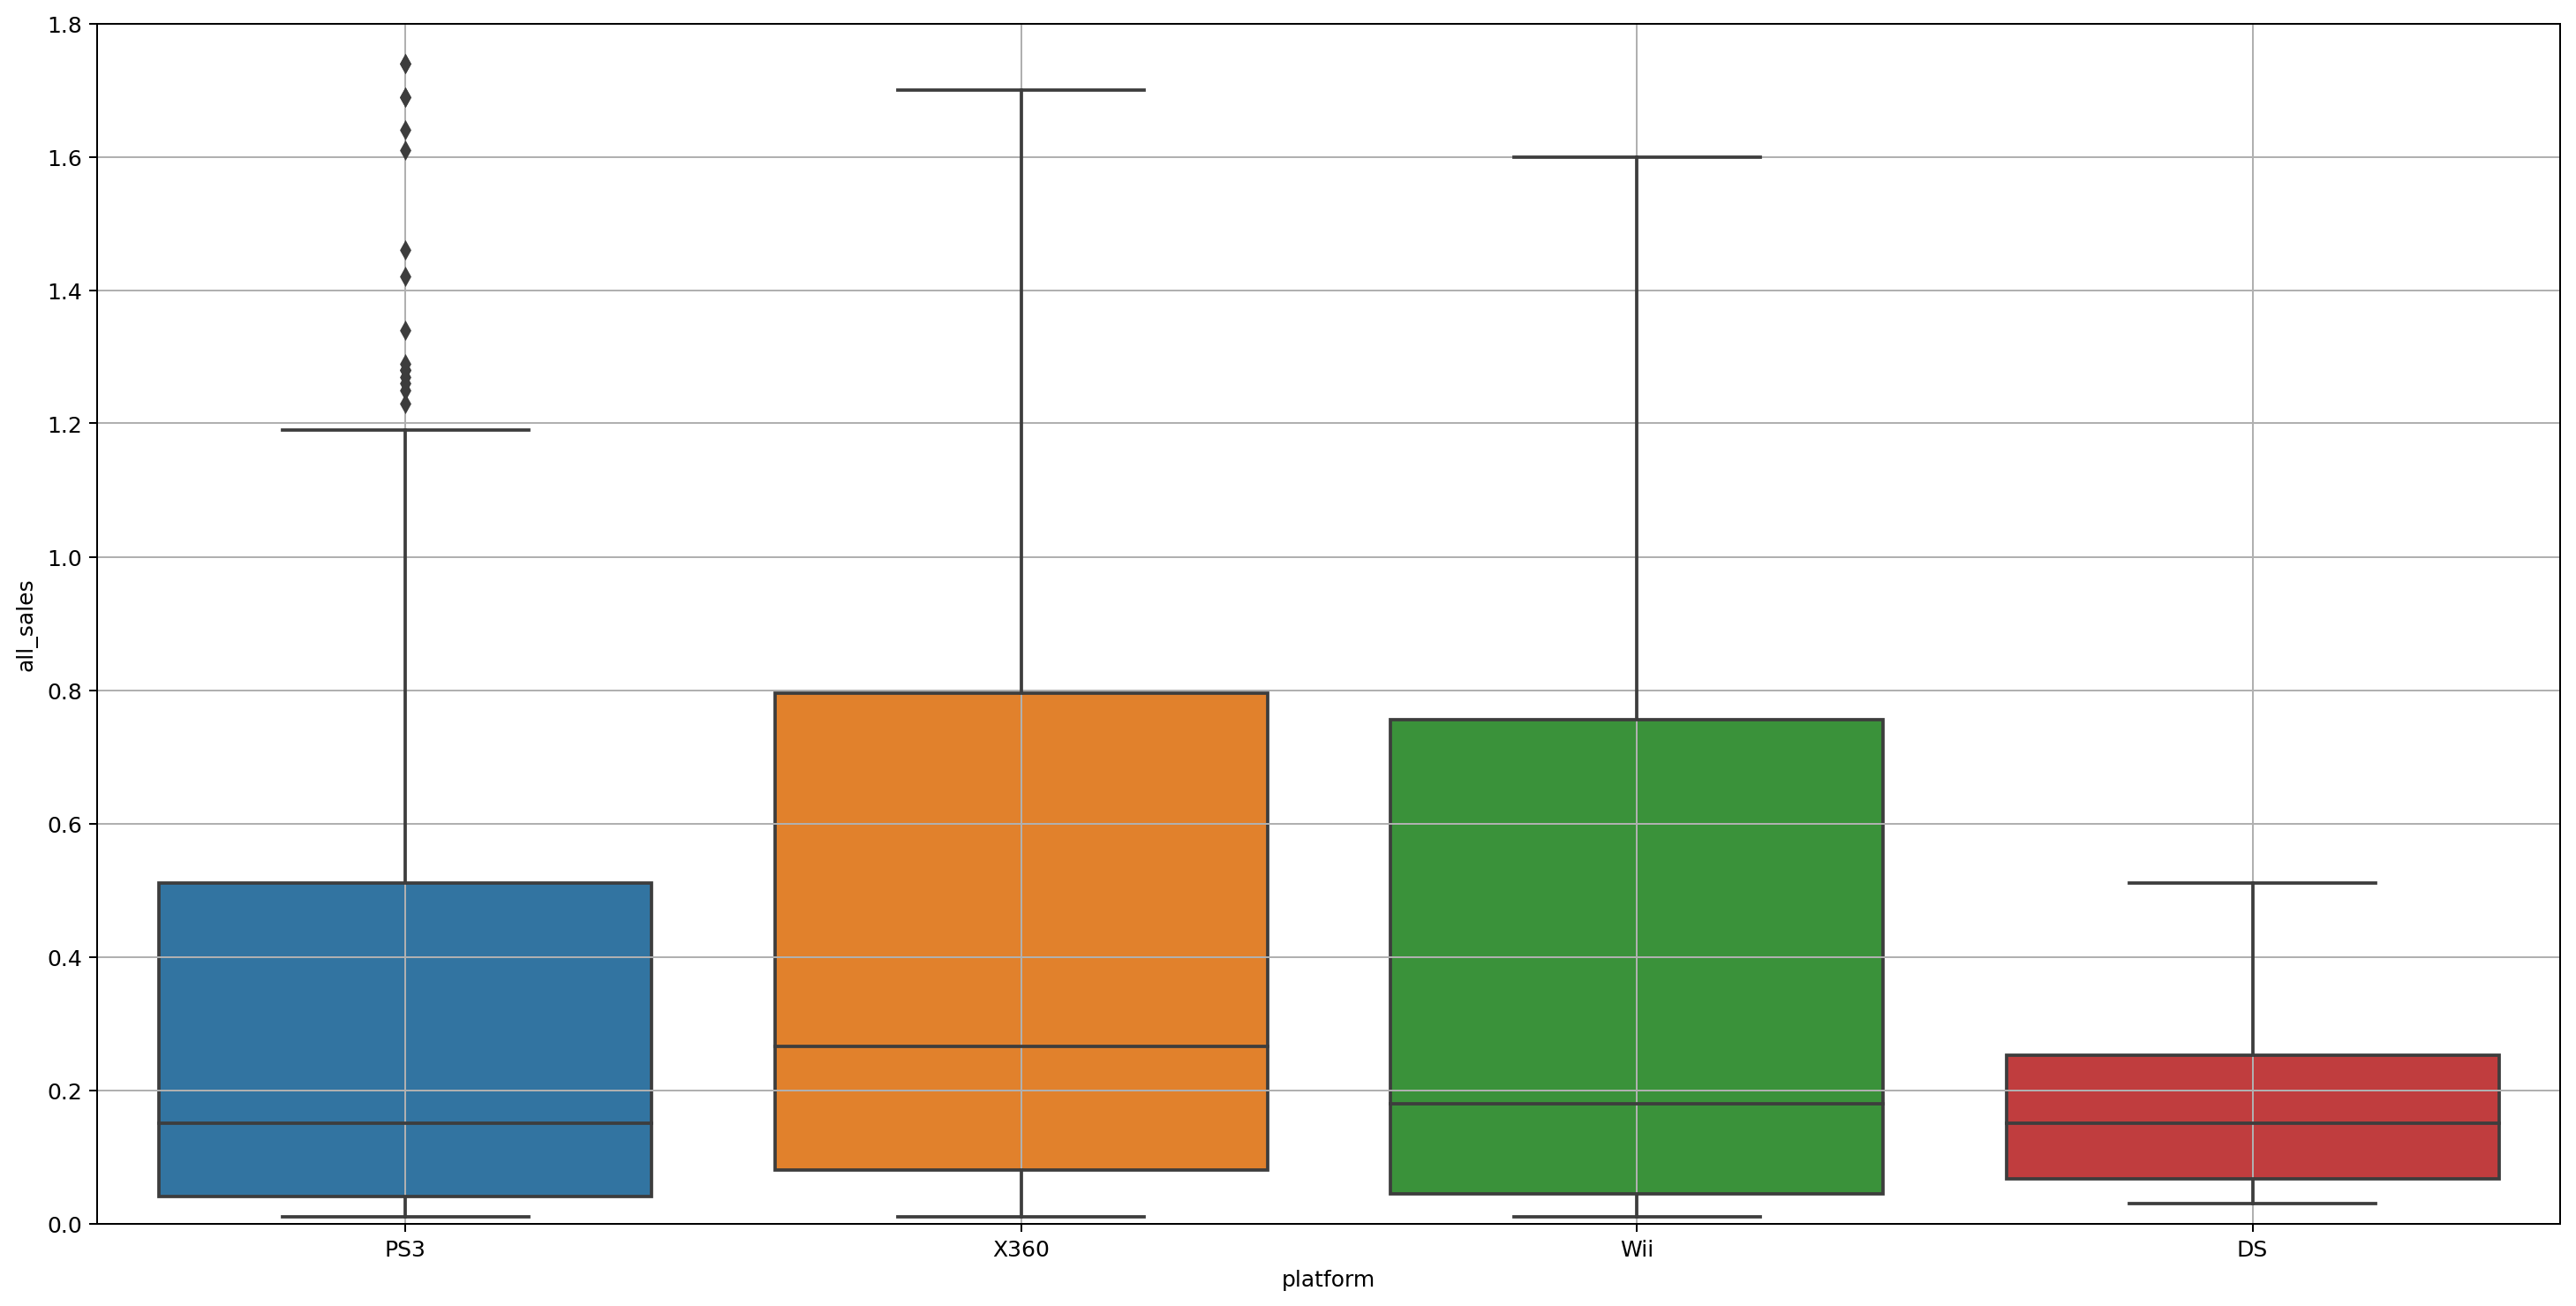

In [32]:
plt.figure(figsize = (20,10), dpi=180)
sns.boxplot(data=data_actual, x='platform', y='all_sales')
plt.ylim([0,1.8])
plt.grid()

In [33]:
data_actual.loc[(data_actual['platform'] == 'PS3')].sort_values(by='all_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.60,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.30,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.10,M,5.86
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,-1,0.00,0,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...
15923,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,-1,0.00,0,0.01
15887,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73,6.90,E,0.01
15639,Rugby League Live 3,PS3,2015,Action,0.00,0.01,0.00,0.00,-1,0.00,0,0.01
15628,Turbo: Super Stunt Squad,PS3,2013,Sports,0.00,0.01,0.00,0.00,38,0.00,E,0.01


**Вывод:** Из графика «ящик с усами» по глобальным продажам игр в разбивке по исследуемым платформам видно, что сильный вброс имеет платформа 'PS3' c игрой "Grand Theft Auto V" в 2013г, с продажами 21.05 млн. Так же есть не значительно выбросы у платформ X360, Wii. А платформа DS сосредоточена в интервале 0-0.5 млн.

### Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков ###

In [34]:
platform_ps2 = data_actual.loc[(data_actual['platform'] == 'PS2')&(data_actual['critic_score'] > 0)
                              &(data_actual['user_score'] > 0)]
platform_ps2 = data_actual[['all_sales','critic_score','user_score']]
platform_ps2['user_score'] = pd.to_numeric(platform_ps2.user_score, errors='coerce')

/tmp/ipykernel_115/3512233934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_ps2['user_score'] = pd.to_numeric(platform_ps2.user_score, errors='coerce')


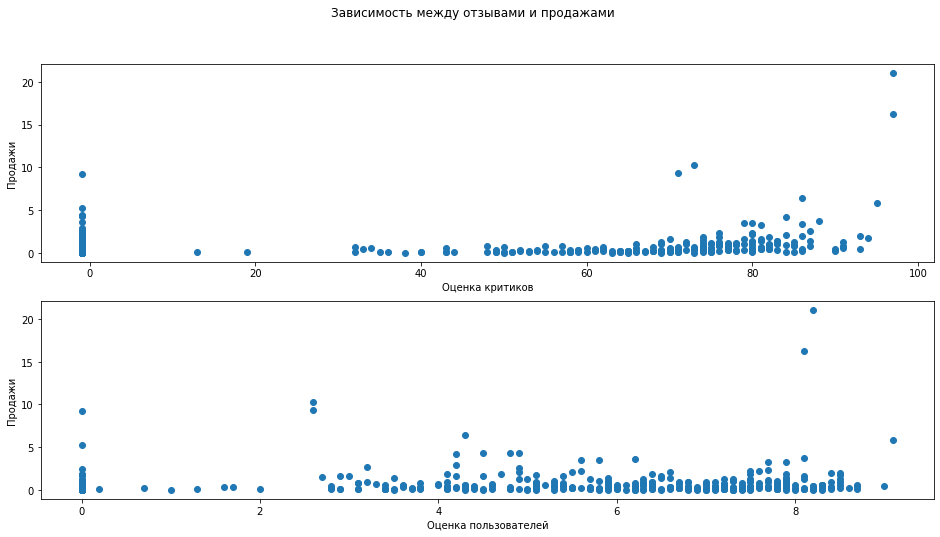

In [35]:
fig, ax = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Зависимость между отзывами и продажами')
ax[0].scatter(x = platform_ps2['critic_score'], y = platform_ps2['all_sales'])
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Продажи')
ax[1].scatter(x = platform_ps2['user_score'], y = platform_ps2['all_sales'])
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Продажи')
plt.show()

In [36]:
platform_ps2.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.27,0.18
critic_score,0.27,1.00,0.65
user_score,0.18,0.65,1.00


**Вывод:** Для исследования отобрали платформу PS2 и провели исследование зависимости с оценками пользователей и критиков. Корреляция между оценками критиков и пользователей и всеми продажами относительно небольшая и прямая, с коэффициентами 0.27 и 0.18 соответственно. Но есть достаточно сильная зависимость между оценками критиков и пользователей, 0.65. Если оценки критиков высокая или будет увеличиваться, то скорее всего, что и оценка пользователей будет высокая или увеличиваться за ней.

### Исследование продажам игр на других платформах ###

/tmp/ipykernel_115/1349274710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_x360['user_score'] = pd.to_numeric(platform_x360.user_score, errors='coerce')


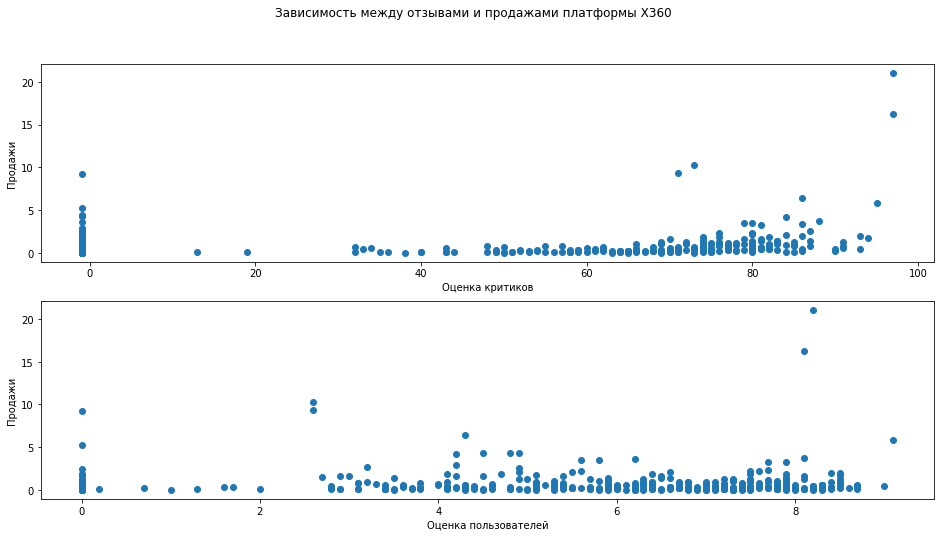

In [37]:
platform_x360 = data_actual.loc[(data_actual['platform'] == 'X360')&(data_actual['critic_score'] >0)
                               &(data_actual['user_score'] >0)]
platform_x360 = data_actual[['all_sales','critic_score','user_score']]
platform_x360['user_score'] = pd.to_numeric(platform_x360.user_score, errors='coerce')

fig, ax = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Зависимость между отзывами и продажами платформы X360')
ax[0].scatter(x = platform_x360['critic_score'], y = platform_x360['all_sales'])
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Продажи')
ax[1].scatter(x = platform_x360['user_score'], y = platform_x360['all_sales'])
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Продажи')
plt.show()

In [38]:
platform_x360.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.27,0.18
critic_score,0.27,1.00,0.65
user_score,0.18,0.65,1.00


/tmp/ipykernel_115/1010142737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_ps3['user_score'] = pd.to_numeric(platform_ps3.user_score, errors='coerce')


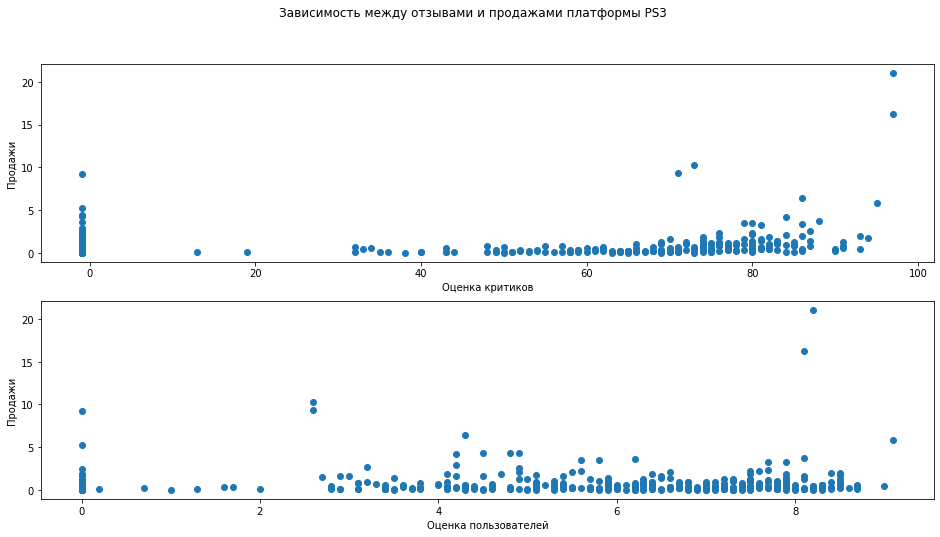

In [39]:
platform_ps3 = data_actual.loc[(data_actual['platform'] == 'PS3')&(data_actual['critic_score'] >0)
                              &(data_actual['user_score'] >0)]
platform_ps3 = data_actual[['all_sales','critic_score','user_score']]
platform_ps3['user_score'] = pd.to_numeric(platform_ps3.user_score, errors='coerce')

fig, ax = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Зависимость между отзывами и продажами платформы PS3')
ax[0].scatter(x = platform_ps3['critic_score'], y = platform_ps3['all_sales'])
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Продажи')
ax[1].scatter(x = platform_ps3['user_score'], y = platform_ps3['all_sales'])
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Продажи')
plt.show()

In [40]:
platform_ps3.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.27,0.18
critic_score,0.27,1.00,0.65
user_score,0.18,0.65,1.00


/tmp/ipykernel_115/3948336023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_wii['user_score'] = pd.to_numeric(platform_wii.user_score, errors='coerce')


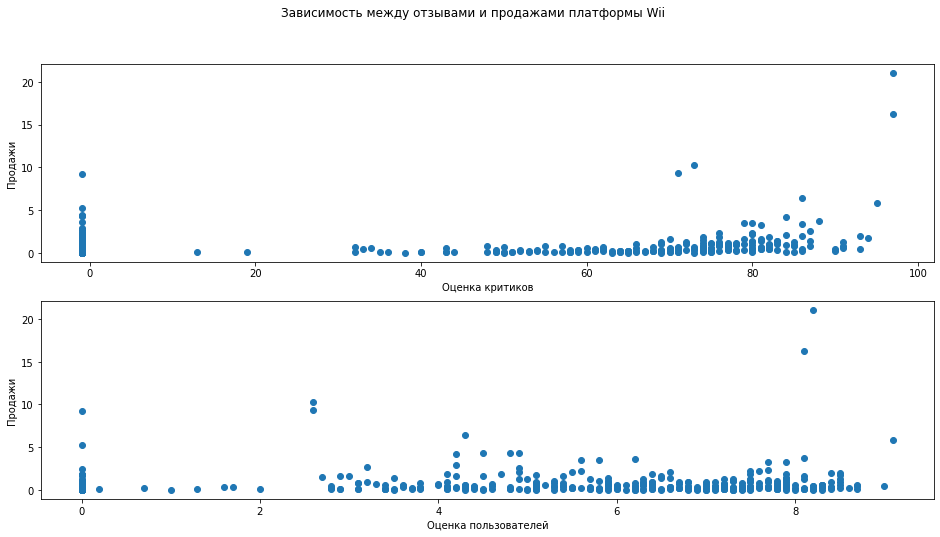

In [41]:
platform_wii = data_actual.loc[(data_actual['platform'] == 'Wii')&(data_actual['critic_score'] >0)
                              &(data_actual['user_score'] >0)]
platform_wii = data_actual[['all_sales','critic_score','user_score']]
platform_wii['user_score'] = pd.to_numeric(platform_wii.user_score, errors='coerce')

fig, ax = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Зависимость между отзывами и продажами платформы Wii')
ax[0].scatter(x = platform_wii['critic_score'], y = platform_wii['all_sales'])
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Продажи')
ax[1].scatter(x = platform_wii['user_score'], y = platform_wii['all_sales'])
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Продажи')
plt.show()

In [42]:
platform_wii.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.27,0.18
critic_score,0.27,1.00,0.65
user_score,0.18,0.65,1.00


/tmp/ipykernel_115/3348528374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_ds['user_score'] = pd.to_numeric(platform_ds.user_score, errors='coerce')


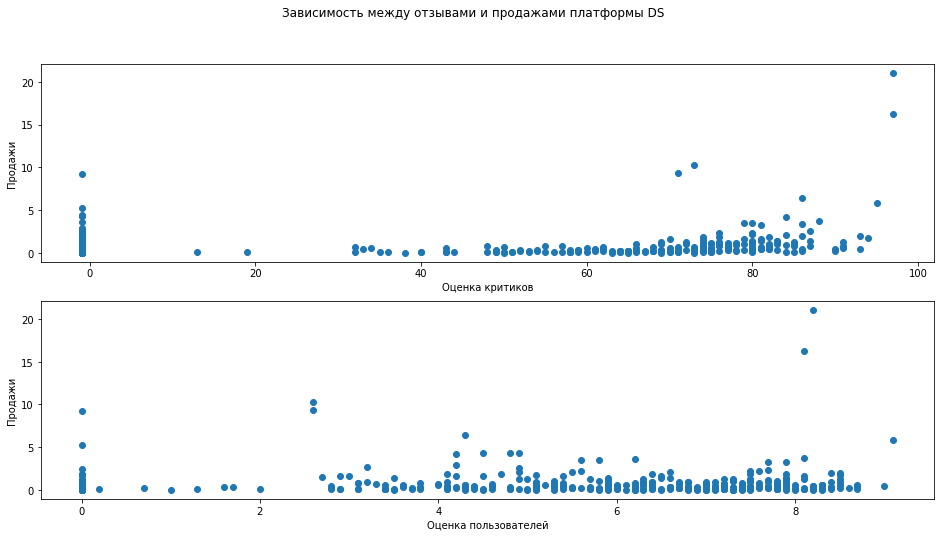

In [43]:
platform_ds = data_actual.loc[(data_actual['platform'] == 'DS')&(data_actual['critic_score'] >0)
                             &(data_actual['user_score'] >0)]
platform_ds = data_actual[['all_sales','critic_score','user_score']]
platform_ds['user_score'] = pd.to_numeric(platform_ds.user_score, errors='coerce')

fig, ax = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Зависимость между отзывами и продажами платформы DS')
ax[0].scatter(x = platform_ds['critic_score'], y = platform_ds['all_sales'])
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Продажи')
ax[1].scatter(x = platform_ds['user_score'], y = platform_ds['all_sales'])
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Продажи')
plt.show()

In [44]:
platform_ds.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.27,0.18
critic_score,0.27,1.00,0.65
user_score,0.18,0.65,1.00


/tmp/ipykernel_115/3128549159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_ps['user_score'] = pd.to_numeric(platform_ps.user_score, errors='coerce')


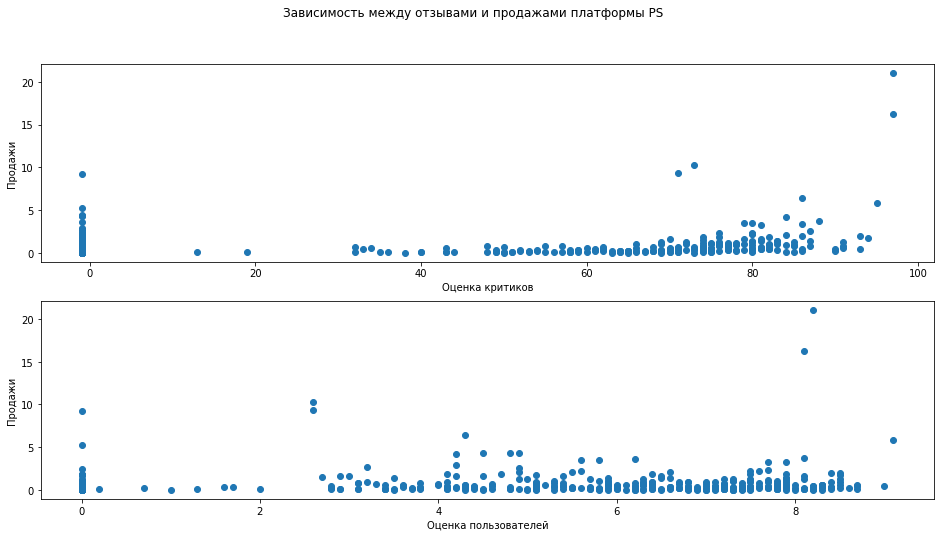

In [45]:
platform_ps = data_actual.loc[(data_actual['platform'] == 'PS')&(data_actual['critic_score'] >0)
                             &(data_actual['user_score'] >0)]
platform_ps = data_actual[['all_sales','critic_score','user_score']]
platform_ps['user_score'] = pd.to_numeric(platform_ps.user_score, errors='coerce')

fig, ax = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Зависимость между отзывами и продажами платформы PS')
ax[0].scatter(x = platform_ps['critic_score'], y = platform_ps['all_sales'])
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Продажи')
ax[1].scatter(x = platform_ps['user_score'], y = platform_ps['all_sales'])
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Продажи')
plt.show()

**Вывод:** Исследования остальных платформ 'X360', 'PS3', 'Wii', 'DS', 'PS' провели к таким же результатам. Корреляция между оценками критиков и пользователей и всеми продажами относительно небольшая и прямая, с коэффициентами 0.27 и 0.18 соответственно. Но есть достаточно сильная зависимость между оценками критиков и пользователей, 0.65.

### Общее распределение игр по жанрам ###

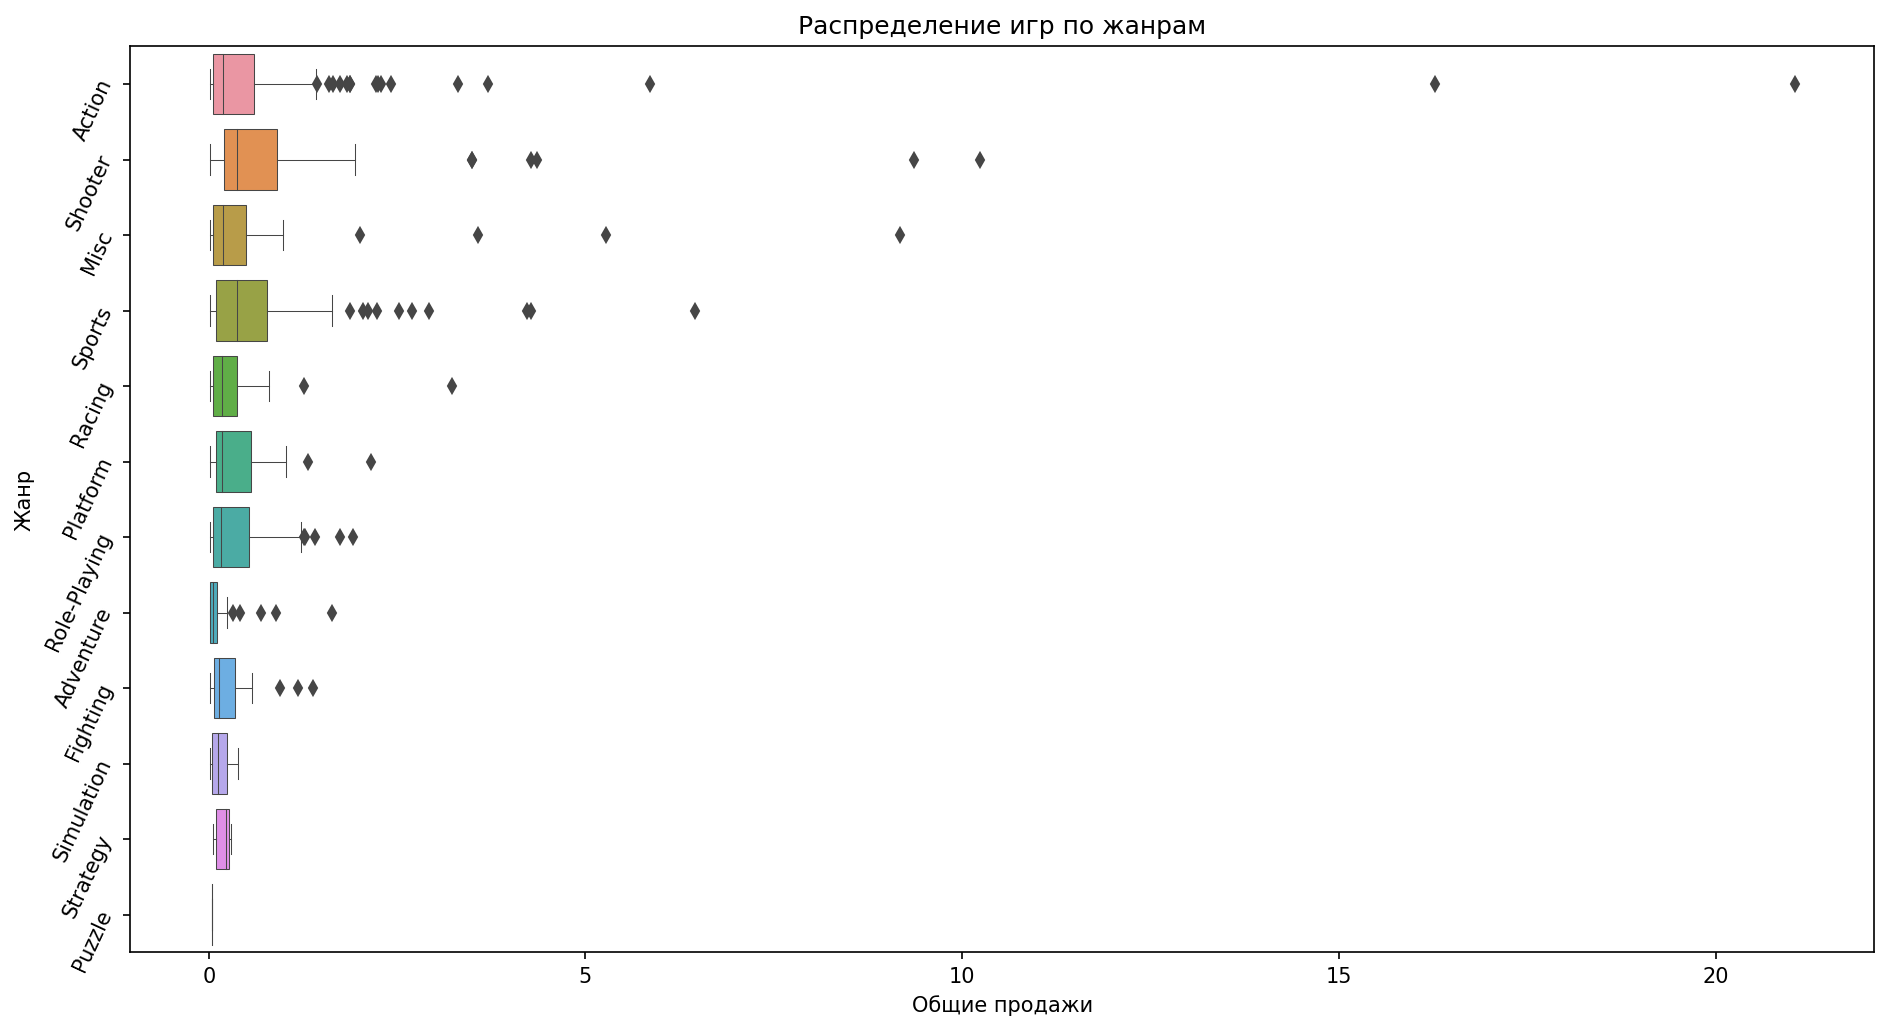

In [46]:
plt.figure(figsize = (15,8), dpi=150)
sns.boxplot(data=data_actual, x='all_sales', y='genre',linewidth=0.5)
plt.title('Распределение игр по жанрам')
plt.xlabel('Общие продажи')
plt.ylabel('Жанр')
plt.yticks(rotation = 65)
plt.show()

**Вывод:** Из графика можно выделить 3 лидирующих жанра это Shooter, Storts, Action с 11 млн, 7 млн и 25 млн соответственно. А с самыми низкими продажами приходится на жанры Puzzle, Adventure, Strategy.
К Action, Shooter и Misc есть достоточно большие вбросы, поэтому их медиальное значение сдвинуто.

## Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы для пользователя каждого региона

In [47]:
def top_platform_region(x, region):
    result = data_actual.groupby(x)[[region, 'all_sales']].sum().sort_values(by=region, ascending = False).head()
    result['ratio'] = result[region]/result['all_sales']
    return result

In [48]:
top_platform_region('platform','na_sales')

,na_sales,all_sales,ratio
platform,,,
X360,81.66,136.80,0.60
PS3,63.50,181.43,0.35
Wii,6.56,13.66,0.48
DS,0.57,1.54,0.37


In [49]:
top_platform_region('platform','eu_sales')

,eu_sales,all_sales,ratio
platform,,,
PS3,67.81,181.43,0.37
X360,42.52,136.80,0.31
Wii,5.93,13.66,0.43
DS,0.85,1.54,0.55


In [50]:
top_platform_region('platform','jp_sales')

,jp_sales,all_sales,ratio
platform,,,
PS3,23.35,181.43,0.13
X360,0.51,136.80,0.00
Wii,0.05,13.66,0.00
DS,0.00,1.54,0.00


**Вывод:** Самые популярные платформы в Северной Америке можно выделить X360 с общей доле продаж на рынке 60%, в Европе откровенно лидирующих платформ нет, в среднем все имеют одинаковые доли в общем от рынка от 31-55%, в Японии PS3 13%, а остальные платформ не набирают и 0%.

### Самые популярные жанры для пользователя каждого региона

In [51]:
top_platform_region('genre','na_sales')

,na_sales,all_sales,ratio
genre,,,
Action,52.62,121.83,0.43
Shooter,34.37,67.27,0.51
Sports,28.18,59.29,0.48
Misc,14.80,27.99,0.53
Role-Playing,8.48,20.92,0.41


In [52]:
top_platform_region('genre','eu_sales')

,eu_sales,all_sales,ratio
genre,,,
Action,44.15,121.83,0.36
Shooter,22.97,67.27,0.34
Sports,21.74,59.29,0.37
Misc,9.43,27.99,0.34
Racing,5.01,9.53,0.53


In [53]:
top_platform_region('genre','jp_sales')

,jp_sales,all_sales,ratio
genre,,,
Action,9.78,121.83,0.08
Role-Playing,5.17,20.92,0.25
Fighting,2.30,8.60,0.27
Shooter,2.05,67.27,0.03
Sports,1.86,59.29,0.03


**Вывод:** В Северной Америке можно выделить топ 5 популярных жанров Action, Sports, Shooter, Misc, Role-Playing в среднем все имеют одинаковые доли в общем от рынка 0.41-0.53, в Европе откровенно лидирующих жанров нет, жанр Action имеет высокий уровень продаж 44.15 млн, но небольшую долю на рынке 0.36, в Японии лидер по продажам является жанр Action с продажами 9.78 млн, а большую долю ранка имеет жанр Fighting с 0,27 частью.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [54]:
data_actual['rating'].value_counts()

0       186
M       114
T        94
E        94
E10+     74
Name: rating, dtype: int64

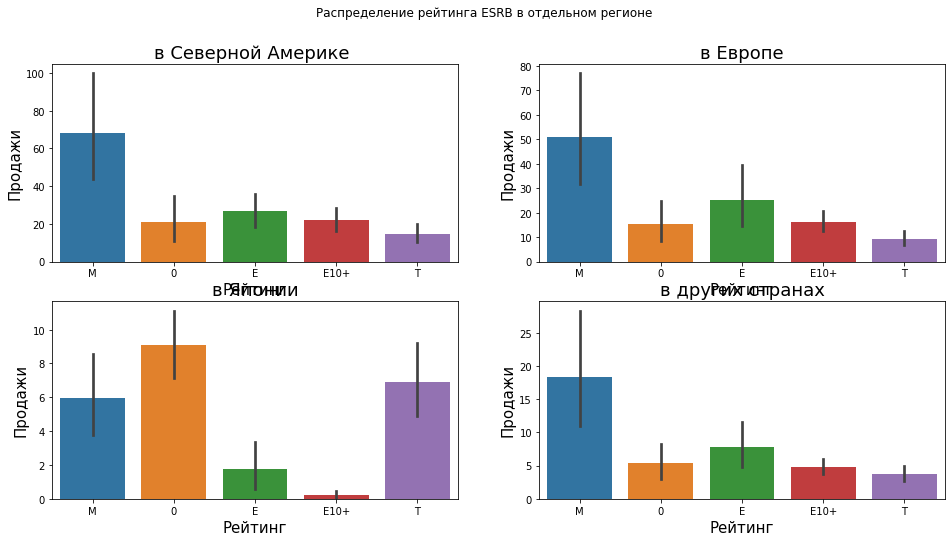

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(16,8))
fig.suptitle('Распределение рейтинга ESRB в отдельном регионе')

sns.barplot(data=data_actual, x='rating', y='na_sales', estimator=np.sum, ax=axs[0,0])
axs[0,0].set_title('в Северной Америке ', fontsize = 18)
axs[0,0].set_xlabel('Рейтинг',fontsize = 15)
axs[0,0].set_ylabel('Продажи',fontsize = 15)
 
sns.barplot(data=data_actual, x='rating', y='eu_sales', estimator=np.sum, ax=axs[0,1])
axs[0,1].set_title('в Европе', fontsize = 18)
axs[0,1].set_xlabel('Рейтинг',fontsize = 15)
axs[0,1].set_ylabel('Продажи',fontsize = 15)
 
sns.barplot(data=data_actual, x='rating', y='jp_sales', estimator=np.sum, ax=axs[1,0]) 
axs[1,0].set_title('в Японии', fontsize = 18)
axs[1,0].set_xlabel('Рейтинг',fontsize = 15)
axs[1,0].set_ylabel('Продажи',fontsize = 15)

sns.barplot(data=data_actual, x='rating', y='other_sales', estimator=np.sum, ax=axs[1,1])
axs[1,1].set_title('в других странах', fontsize = 18)
axs[1,1].set_xlabel('Рейтинг',fontsize = 15)
axs[1,1].set_ylabel('Продажи',fontsize = 15)
plt.show() 

**Вывод:** Самые популярные оценки рейтинга ESRB являются 'E', 'T', 'E10+', 'M', но чтоб не потерять данные в анализ включены пропущенные значения с 0. По всем регионам 'М' имеет наибольшее количество продаж, кроме Японии, там чуть меньше. Рейтинг 'E10+' в Японии имеет по отношению к другим регионам самый низкий уровень продаж, около 1 млн, тогда как в Северной Америке, Европе и других странах она составляет около 21 млн, 19 млн и 5 млн соответственно. В Японии заметно выделяются рейтинг с 'T', 0, где 'Т' это игры направлены на подростковую аудитория и уже могут содержать умеренное насилие, чисто подростковый юмор и умеренное количество откровенных сцен наряду с редким использованием ненормативной лексики, а 0 это игры, скорее всего, которые не котируются в Японии.

## Проверка гипотез

**Гипотеза 1**
Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC различаются.

In [56]:
period_actual['user_score'] = period_actual['user_score'] > 0
alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(period_actual['user_score'].loc[(period_actual['platform'] == "XOne")].dropna(),
                       period_actual['user_score'].loc[(period_actual['platform'] == "PC")].dropna())
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.03981358558167057
Отвергаем нулевую гипотезу


/tmp/ipykernel_115/3408259637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_actual['user_score'] = period_actual['user_score'] > 0


**Гипотеза 2**
Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action и Sports различаются.

In [57]:
alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(period_actual['user_score'].loc[(period_actual['genre'] == "Action")].dropna(),
                       period_actual['user_score'].loc[(period_actual['genre'] == "Sports")].dropna())
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8887406123185774e-10
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, т.е. чтобы все данные лежали в районе изначально предполагаемого значения. Соответственно гипотез данные по условию, принимает как альтернативные, т.к. они имеют знак неравенства.
Для проверки данных гипотез используем ttest_ind, потому что этот метод подходит для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.


## Общий вывод
    Для анализа данных по определению потенциально выгодной платформы и игры были проделаны следующие действия:
1. Открытие файла с данными и изучение информации
- в датасете 16715 строк и 11 колонок с типами данных float, object;
- есть пропущенные значения в некоторых столбцах "Название игры", "Год выпуска", "Платформа", "Жанр". Эти пропуски незначительны и возможно связаны с не корректным вводом. А пропуски в "Рейтинг от организации ESRB", "Оценка пользователей", "Оценка критиков" в основном относятся к старым данным, возможно в те года не было еще таких оценок.
- данные рассматриваются с 1980-2016 года;
- суммы по продажам близки к максимальным значениям.
2. Подготовка данных
- преобразованы форматы необходимых для расчетов столбцов из float64 в int64, а object в float64;
- удалены с пропусками в "Название игры" всего 2 строки и в "Год выпуска" 269 строки, т.к. они составили менее 1% от всей совокупности данных;
- в "Рейтинг от организации ESRB","Оценка критиков" и "Оценка пользователей" пропущенные значения преобразовали в 0, для упрощения дальнейших расчетов;
- значения tbd в "Оценка пользователей" заменим на 0, т.к. данные на момент выгрузки не были известны;
- все продажи были округлены, переведены в количественный формат, а их суммы добавлены в новый столбец "all_sales".
3. Исследовательский анализ данных
- количество игр в 1980г составило всего 9 игр, а максимальное значение было в 2008г 1427шт. В 2016г было всего выпущено 502 игры.
- первое место по всем продажам занимает PS2: 1200 млн, так же топовые платформ можно назвать такие как SDS, WS, 3DO, PCFX, NG, GG, NG16.
- средняя продолжительность жизни платформы равно 8 годам;
- актуальный период был выбран с 2013г;
- по графику  «ящик с усами» по глобальным продажам игр в разбивке по топовым платформам видно, что сильный выброс имеет платформа 'PS3' c игрой "Grand Theft Auto V" в 2013г;
- корреляция между оценками критиков и пользователей и всеми продажами по лидирующим платформам относительно небольшая и прямая, с коэффициентами 0.27 и 0.18 соответственно. Но есть достаточно сильная зависимость между оценками критиков и пользователей, 0.65;
- можно выделить 3 лидирующих жанра это Shooter, Storts, Action с 11 млн, 7 млн и 25 млн соответственно. А с самыми низкими продажами приходится на жанры Puzzle, Adventure, Strategy.
4. Портрет пользователя каждого региона (NA, EU, JP)
- самые популярная платформа в Северной Америке  X360 с общей доле продаж 60%, в Европе лидиров нет, в среднем все имеют одинаковые доли от 31-55%, в Японии PS3 13%, а остальные не набирают и 0%;
- в Северной Америке можно выделить топ 5 популярных жанров Action, Sports, Shooter, Misc, Role-Playing в среднем все имеют одинаковые доли рынка 0.41-0.53, в Европе откровенно лидирующих жанров нет, жанр Action имеет высокий уровень продаж 44.15 млн, но небольшую долю на рынке 0.36, в Японии лидер по продажам является жанр Action с продажами 9.78 млн, а большую долю ранка имеет жанр Fighting с 0,27 частью;
- самые популярные оценки рейтинга ESRB являются 'E', 'T', 'E10+', 'M', но чтоб не потерять данные в анализ включены пропущенные значения с 0. По всем регионам 'М' имеет наибольшее количество продаж, кроме Японии, там чуть меньше. Рейтинг 'E10+' в Японии имеет по отношению к другим регионам самый низкий уровень продаж, около 1 млн, тогда как в Северной Америке, Европе и других странах она составляет около 21 млн, 19 млн и 5 млн соответственно. В Японии заметно выделяются рейтинг с 'T'и неопределенным рейтингом.
5. Проверка гипотез
- средние пользовательские рейтинги платформ Xbox One и PC не равны;
- средние пользовательские рейтинги жанров Action и Sports равныю

    Перспективным для вложения в развитие выделить практически невозможно, т.к. практически все платформы находятся в упадке, это видно по графику "Распределения суммарных продаж по продажам за весь период". Скорее всего это связанно с появлением новых платформ, например, планшеты и телефоны со своими площадками для игр. Но для поддержания жизни некоторых платформ, считаю что нужно обратить внимание на Американского пользователя по жанру Action Shooter на платформе PS2.